![Astrofisica Computacional](../logo.PNG)

---
## 02. Ecuaciones Diferenciales Parciales II. Métodos de Diferencias Finitas. La Ecuación Lineal de Advección. 

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

Se presentan algunos métodos para resolver la ecuación de advección lineal de advección.


---

## La Ecuación Lineal de Advección 

Considere la ecuación de continuidad,

\begin{equation}
\frac{\partial \rho}{\partial t} + \vec{\nabla} \cdot (\rho \vec{v}) = 0
\end{equation}

en el caso particular de un sistema unidimensional y para un fluido que se mueve con velocidad constante,

\begin{equation}
\frac{\partial \rho}{\partial t} + \vec{v}_x \frac{\partial \rho}{\partial x}  = 0.
\end{equation}

Esta es un ejemplo de los **sistemas hiperbólicos de primer orden** en una dimensión espacial y se denomina la **ecuación lineal de advección**. Utilizando la función $\psi=\psi(t,x)$ dentro de esta ecuación, se tiene

\begin{equation}
\partial_t \psi + v \partial_x \psi = 0\,\,,
\end{equation}

donde $v$ es una constante. Una solución exacta de esta ecuación está dada por cualquier función que dependa de los argumentos

\begin{equation}
\psi(t,x) = \psi(x\pm vt)\,\,.
\end{equation}

De esta forma, la ecuación de advección trasladará el perfil inicial dado a lo largo del eje-x con una velocidad constante $v$.

---

## Métodos de Solución para la Ecuación de Advección

### 1. Discretización FTCS 

Este método de diferencias finitas esta basado en discretizar la derivada temporal hacia adelante y la derivada espacial centrada. Su nombre proviene de las siglas en inglés (**F**orward in **T**ime, **C**entered in **S**pace: FTCS).  Esta discretización lleva de inmediato a la relación 

\begin{equation}
  \psi^{(n+1)}_j = \psi^{(n)}_j - \frac{v \Delta t}{2\Delta x} \left(\psi^{(n)}_{j+1} - \psi^{(n)}_{j-1}\right)\,\,.
\end{equation}

En esta ecuación, el índice $n$ hace referencia a la discretización temporal mientras que el índice $j$ se refiere a la discretización espacial. 

**Condiciones de frontera**

Es importante notar que en este método, la definición de la malla necesita de un criterio para tratar las condiciones de frontera. Algunos de los posibles criterios son:

- *Outflow* : la información de los últimos puntos internos se copia en los puntos de frontera. En este caso el perfil sale del dominio de integración sin devolverse.

- *Condición Periodica* : La información de los puntos de la frontera en uno de los extremos se copia en el otro extremo. En esta caso, el perfil sale por uno de los extremos del dominio de integración para re-aparecer por el otro extremo.


**Estabilidad (Criterio de Von Neumann)**

La estabilidad del método se analiza introduciendo la función $\psi(x_j,t_0) = \psi_j^{(0)} = e^{ikx_j} = e^{ikj\Delta x} $ en la ecuación discretizada. Esto da como resultado

\begin{equation}
\begin{aligned}
\psi^{(1)}_j &= e^{ik j\Delta x } - \frac{v \Delta t}{2\Delta x} \left(e^{ik (j+1)\Delta x } - e^{ik (j-1) \Delta x }\right)\,\,,\\
\psi^{(1)}_j &= \left[ 1 - \frac{v\Delta t}{2 \Delta x} \left( e^{ik\Delta x} - e^{-ik\Delta x} \right) \right] e^{ik j \Delta x }\,\,,\\
\psi^{(1)}_j &= \underbrace{\left[ 1- \frac{v\Delta t}{\Delta x} i \sin(k\Delta x) \right]}_{{=\xi}} e^{ik j \Delta x }\,\,,
\end{aligned}
\end{equation}

Después de $n$ iteraciones, 

\begin{equation}
\begin{aligned}
\psi^{(n)}_j &= \left[ 1- \frac{v\Delta t}{\Delta x} i \sin(k\Delta x) \right]^n e^{ik j \Delta x } = \xi^n e^{ik j \Delta x }\,\,.
\end{aligned}
\end{equation}

El coeficiente $\xi$ satisface 

\begin{equation}
|\xi| = \sqrt{\xi \xi^*} = \sqrt{1 + \left(\frac{v\Delta t}{\Delta x} \sin(k\Delta x)\right)^2} > 1\,\,,
\end{equation}

lo que implica que el método FTCS es **incondicionalmente inestable** para la ecuación de advección!

### Ejemplo

La advección es un proceso importante en muchas areas de la astrofísica. Por ejemplo, algunos modelos de transporte en la heliosfera consideran distribuciones de partículas aceleradas por choques (Litvinenko-2014) que son descritas, en primera aproximación, por una ecuación de advección-difusión unidimensional para la densidad de partículas. En la aproximación de difusión débil, la ecuación que se debe resolver es

\begin{equation}
\frac{\partial \psi}{\partial t} + v\frac{\partial \psi}{\partial x} = 0\,\,,
\end{equation}

dodne $v$ representa la velocidad de advección constante que puede ser interpretada como la rapidez del viento solar.

Como un primer ejemplo para resolver esta ecuacion diferencial parcial, se advectará un perfil Gaussiano,

\begin{equation}
 \Psi_0 = \psi(x,t=0) = e^{-\frac{(x-x_0)^2 }{2 \sigma^2}},
\end{equation}
 
donde $x_0 = 30$, $\sigma = \sqrt{15}$, con una velocidad positiva $v = 0.1$ en el dominio $[0,100]$.

En este caso se utilizará el criterio de **outflow** para las fronteras.

---
### Evolución Temporal de la Solución




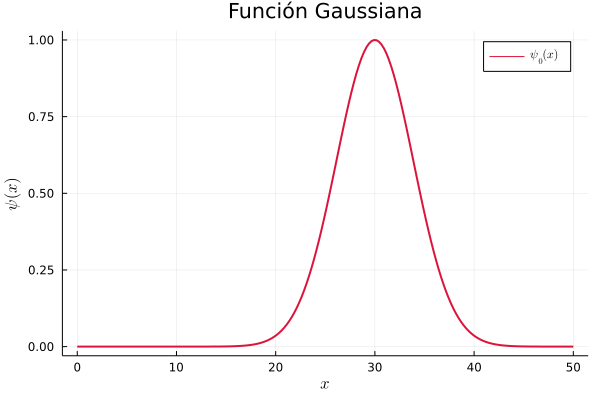

In [2]:
using Plots
using LaTeXStrings

# Definition of the initial Gaussian profile
function gaussian(x)
    x0 = 30.
    sigma = sqrt(15.)
    return exp(-(x-x0)^2/(2*sigma^2))
end

x = LinRange(0,50,200); y = gaussian.(x); 
plot(x, y, title = "Función Gaussiana", label = L"\psi_0(x)", lw = 2, linecolor="crimson")
xlabel!(L"x")
ylabel!(L"\psi(x)")

dt = 0.07000700070007002
dx = 0.10010010010010009


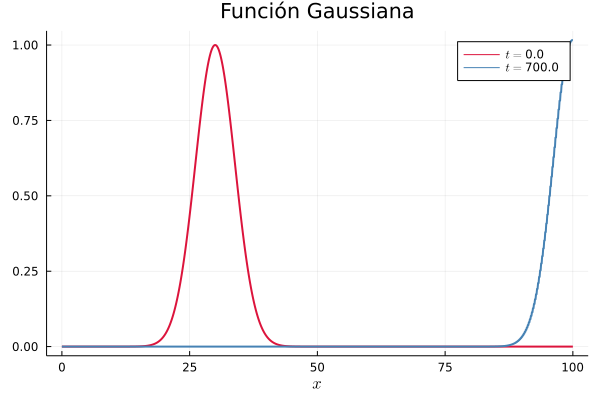

In [3]:
# Definition of the grids
x_i = 0.
x_f = 100.
Nx = 1000
xgrid = LinRange(x_i, x_f, Nx)

t_i = 0.
t_f = 700.
Nt = 10000
tgrid = LinRange(t_i, t_f, Nt)


# Velocity of the advection
v = 0.1


# FTCS Method
function FTCS(psi0, tgrid, xgrid ; boundary="outflow")
    dx = xgrid[2] - xgrid[1]
    dt = tgrid[2] - tgrid[1]
    println("dt = $dt")
    println("dx = $dx")
    
    psi = zeros(length(tgrid), length(xgrid))
    psi[1,:] = gaussian.(xgrid)
    
    for n in 1:length(tgrid)-1 , j in 2:length(xgrid)-1
            psi[n+1,j] = psi[n,j] - ((v*dt)/(2*dx))*(psi[n,j+1] - psi[n,j-1])
        if boundary=="outflow" # Outflow boundary conditions
            psi[n+1,1] = psi[n+1,2]
            psi[n+1,end] = psi[n+1,end-1]
        else # Periodic boudnary conditions
            if v>0
                psi[n+1,1] = psi[n+1,end-1]
                psi[n+1,end] = psi[n+1,end-1]
            else
                psi[n+1,1] = psi[n+1,2]
                psi[n+1,end] = psi[n+1,1]
            end
        end
    end
    return psi
end

psi = FTCS(gaussian, tgrid, xgrid, boundary="outflow")

plot(xgrid, psi[1,:], title = "Función Gaussiana", label = L"t = "*"$t_i", lw = 2, linecolor="crimson")
plot!(xgrid, psi[end,:], title = "Función Gaussiana", label = L"t = "*"$t_f", lw = 2, linecolor="steelblue")
xlabel!(L"x")




┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionFTCS.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionFTCS.gif")
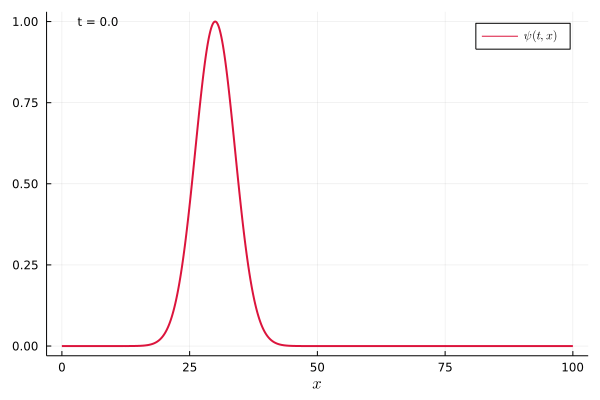

In [4]:
anim = @animate for i in 1:50:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson")
    xlabel!(L"x")
    annotate!(7,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "advectionFTCS.gif", fps = 15)

Como se mostró arriba, em método FTCS es **incondicionalmente inestable** para la ecuación de advección. Por ello se produce el ma comportamiento en la parte final de la anterior animación.  


Para ilustrar nuevamente esta inestabilidad, consideraremos ahora la advección de un perfíl sinuosidal con un paso temporal $dt=0.02$ con condiciones de frontera periodicas. Nótese que en el intervalo temporal $[0, 350]$ el comportamiento no muestra inestabilidades, 

dt = 0.02
dx = 0.10010010010010009


┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionFTCS2.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionFTCS2.gif")
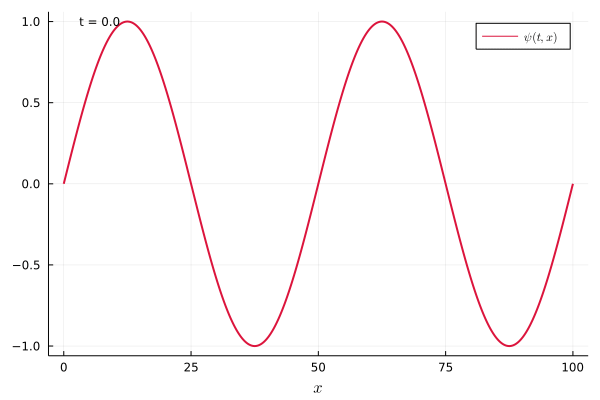

In [17]:
using Plots
using LaTeXStrings

# Definition of the initial sin(x) profile
function sinProfile(x; L=x_f)
    return sin(4*pi*x/L)
end

# FTCS Method
function FTCS(psi0, tgrid, xgrid; boundary="outflow")
    dx = xgrid[2] - xgrid[1]
    dt = tgrid[2] - tgrid[1]
    println("dt = $dt")
    println("dx = $dx")
    
    psi = zeros(length(tgrid), length(xgrid))
    psi[1,:] = psi0.(xgrid)
    
    for n in 1:length(tgrid)-1 , j in 2:length(xgrid)-1
            psi[n+1,j] = psi[n,j] - ((v*dt)/(2*dx))*(psi[n,j+1] - psi[n,j-1])
        if boundary=="outflow" # Outflow boundary conditions
            psi[n+1,1] = psi[n+1,2]
            psi[n+1,end] = psi[n+1,end-1]
        else # Periodic boundary conditions
            if v>0
                psi[n+1,1] = psi[n+1,end-1]
                psi[n+1,end] = psi[n+1,end-1]
            else
                psi[n+1,1] = psi[n+1,2]
                psi[n+1,end] = psi[n+1,1]
            end
        end
    end
    return psi
end


# Velocity of the advection
v = 0.1

# Definition of the grids
x_i = 0.
x_f = 100.
Nx = 1000
xgrid = LinRange(x_i, x_f, Nx)

t_i = 0.
t_f = 350.
dt = 0.02
tgrid = t_i:dt:t_f



psi = FTCS(sinProfile, tgrid, xgrid, boundary="periodic")

anim = @animate for i in 1:100:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson")
    xlabel!(L"x")
    annotate!(7,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "advectionFTCS2.gif", fps = 15)



Sin embargo, al extender el intervalo temporal a $[0,800]$, la inestabilidad aparece,

dt = 0.02
dx = 0.10010010010010009


┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionFTCS3.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionFTCS3.gif")
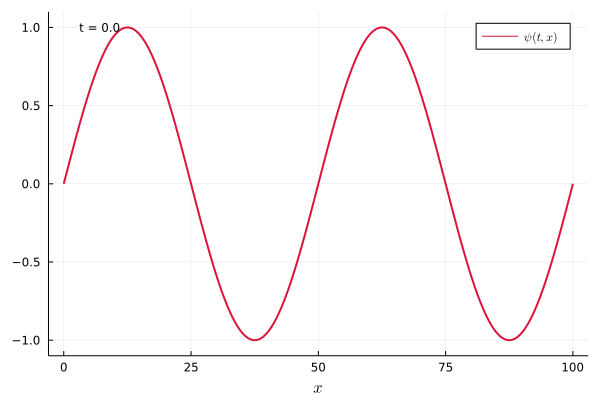

In [11]:
using Plots
using LaTeXStrings

# Definition of the initial sin(x) profile
function sinProfile(x; L=x_f)
    return sin(4*pi*x/L)
end

# FTCS Method
function FTCS(psi0, tgrid, xgrid; boundary="outflow")
    dx = xgrid[2] - xgrid[1]
    dt = tgrid[2] - tgrid[1]
    println("dt = $dt")
    println("dx = $dx")
    
    psi = zeros(length(tgrid), length(xgrid))
    psi[1,:] = psi0.(xgrid)
    
    for n in 1:length(tgrid)-1 , j in 2:length(xgrid)-1
            psi[n+1,j] = psi[n,j] - ((v*dt)/(2*dx))*(psi[n,j+1] - psi[n,j-1])
        if boundary=="outflow" # Outflow boundary conditions
            psi[n+1,1] = psi[n+1,2]
            psi[n+1,end] = psi[n+1,end-1]
        else # Periodic boudnary conditions
            if v>0
                psi[n+1,1] = psi[n+1,end-1]
                psi[n+1,end] = psi[n+1,end-1]
            else
                psi[n+1,1] = psi[n+1,2]
                psi[n+1,end] = psi[n+1,1]
            end
        end
    end
    return psi
end


# Velocity of the advection
v = 0.1


# Definition of the grids
x_i = 0.
x_f = 100.
Nx = 1000
xgrid = LinRange(x_i, x_f, Nx)

t_i = 0.
t_f = 800.
dt = 0.02
tgrid = t_i:dt:t_f


psi = FTCS(sinProfile, tgrid, xgrid, boundary="periodic")

anim = @animate for i in 1:150:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson", ylims=(-1.1,1.1))
    xlabel!(L"x")
    annotate!(7,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "advectionFTCS3.gif", fps = 15)



---

###  2. Método Upwind 

En este método de solución se considera una discretización  de primer orden en el tiempo y de primer orden en el espacio. Para la derivada espacial se tiene dos posibilidades,

\begin{equation}
\begin{aligned}
\frac{\partial \psi}{\partial x} &\approx \frac{1}{\Delta x}(\psi_j - \psi_{j-1}) \hspace{1cm}\text{diferencias finitas hacia la derecha (upwind)}\\
\frac{\partial \psi}{\partial x} &\approx \frac{1}{\Delta x}(\psi_{j+1} - \psi_{j})
\hspace{1cm}\text{diferencias finitas hacia la izquierda (downwind)}
\end{aligned}
\end{equation}

Las dos posibilidades se denominand aproximaciones laterales porque usan información de un lado o del otro del punto $x_j$. Incorporando estas discretizaciones en la ecuación de advección da como resultado

\begin{equation}
\begin{aligned}
\psi_j^{(n+1)} &= \psi_j^{(n)} - \frac{v\Delta t}{\Delta x} \left(\psi_j^{(n)} - \psi_{j-1}^{(n)}\right) \hspace{1cm}\text{(upwind)}\\
\psi_j^{(n+1)} &= \psi_j^{(n)} - \frac{v\Delta t}{\Delta x} \left(\psi_{j+1}^{(n)} - \psi_{j}^{(n)}\right) \hspace{1cm}\text{(downwind)}\,\,.
\end{aligned}
\end{equation}


**Estabilidad**

Un análisis de estabilidad muestra que el método upwind es estable si

\begin{equation}
0 \le \frac{v \Delta t}{\Delta x} \le 1\,\,,
\end{equation}

mientras que el método downwind es estable si

\begin{equation}
-1 \le \frac{v \Delta t}{\Delta x} \le 0\,\,,
\end{equation}

lo cual confirma que para $v > 0$ se debe utilizar el upwind mientras que para $v < 0$ se debe utilizar el downwind.

La condición

\begin{equation}
\alpha = \left|\frac{v\Delta t}{\Delta x}\right| \le 1\,\,
\end{equation}

es una realización matemática de el principio de causalidad: *la propagación de la información (via advección) en un paso de tiempo $\Delta t$ no debe "saltar" adelante más alla del tamaño $\Delta x$ de un intervalo de la malla espacial*.

El criterio $\alpha \le 1$ usualmente se denomina la **condición de Courant-Friedrics-Lewy (CFL)** y se utiliza para determinar el paso temporal permitido dado el tamaño de la malla espacial $\Delta x$. Así, se suele utilizar el paso temporal

\begin{equation}
\Delta t = c_\mathrm{CFL} \frac{\Delta x}{|v|}\,\,,
\end{equation}

donde $c_\mathrm{CFL} \le 1$ se denomina el factor CFL.

dt = 0.10010010010010009
dx = 0.10010010010010009


┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionUpwind.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionUpwind.gif")
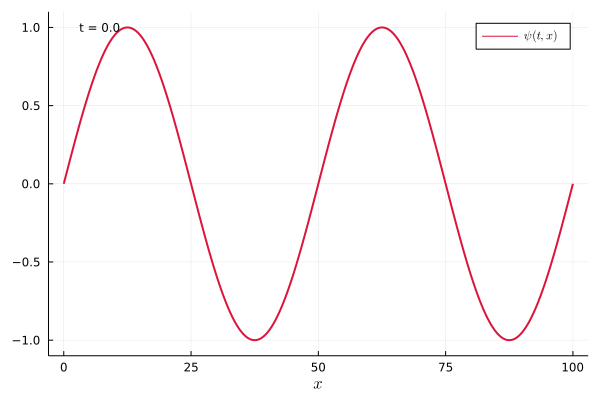

In [5]:
using Plots
using LaTeXStrings

# Definition of the initial sin(x) profile
function sinProfile(x; L=x_f)
    return sin(4*pi*x/L)
end

# Definition of the initial Gaussian profile
function gaussian(x)
    x0 = 30.
    sigma = sqrt(15.)
    return exp(-(x-x0)^2/(2*sigma^2))
end


# upwind-downwind Method
function upwind(psi0, tgrid, xgrid; boundary="outflow")
    dx = xgrid[2] - xgrid[1]
    dt = tgrid[2] - tgrid[1]
    println("dt = $dt")
    println("dx = $dx")
    
    psi = zeros(length(tgrid), length(xgrid))
    psi[1,:] = psi0.(xgrid)
    
    if v>0
        for n in 1:length(tgrid)-1 , j in 2:length(xgrid)-1
                psi[n+1,j] = psi[n,j] - ((v*dt)/(dx))*(psi[n,j] - psi[n,j-1])
            if boundary=="outflow" # Outflow boundary conditions
                psi[n+1,1] = psi[n+1,2]
                psi[n+1,end] = psi[n+1,end-1]
            else # Periodic boudnary conditions
                psi[n+1,1] = psi[n+1,end-1]
                psi[n+1,end] = psi[n+1,end-1]
            end
        end
    else
        for n in 1:length(tgrid)-1 , j in 2:length(xgrid)-1
                psi[n+1,j] = psi[n,j] - ((v*dt)/(2*dx))*(psi[n,j+1] - psi[n,j])
            if boundary=="outflow" # Outflow boundary conditions
                psi[n+1,1] = psi[n+1,2]
                psi[n+1,end] = psi[n+1,end-1]
            else # Periodic boudnary conditions
                psi[n+1,1] = psi[n+1,2]
                psi[n+1,end] = psi[n+1,1]
            end
        end
    end
    return psi
end


# Velocity of the advection
v = -0.1

# CFL Coefficient
C = 0.1

# Definition of the grids
x_i = 0.
x_f = 100.
xgrid = LinRange(x_i, x_f, 1000)
dx = xgrid[2] - xgrid[1]

t_i = 0.
t_f = 2000.
dt = C*dx/abs(v)
tgrid = t_i:dt:t_f



#psi = FTCS(sinProfile, tgrid, xgrid, boundary="periodic")
psi = upwind(sinProfile, tgrid, xgrid, boundary="periodic")



anim = @animate for i in 1:150:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson", ylims=(-1.1,1.1))
    xlabel!(L"x")
    annotate!(7,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "advectionUpwind.gif", fps = 15)



---
### 3. Método Lax-Friedrich

El método Lax-Friedrichs, al igual que el FTCS, es de primer orden en el tiempo y segundo orden en el espacio. La ecuación correspondiente es

\begin{equation}
\psi_{j}^{(n+1)} = \frac{1}{2}\left(\psi^{(n)}_{j+1} + \psi^{(n)}_{j-1}\right) - 
\frac{v \Delta t}{2\Delta x} \left(\psi^{(n)}_{j+1} - \psi^{(n)}_{j-1}\right)\,\,,
\end{equation}

de donde se puede comprobar que este método difiere del método FTCS en que se ha logrado la estabilidad para $\alpha \le 1$ al utilizar el promedio del antiguo valor (i.e. en $n$) en los puntos $j+1$ y $j-1$ para calcular el valor actualizado (i.e, en $n+1$) en el punto $j$. Es posible demostrar que este tratamiento es equivalente a incluir un termino disipativo en las ecuaciones (que se encarga de amortiguar la inestabilidad del método FTCS) y por ello conelleva a una menor precisión que se manifiesta como una disipación del perfil inicial.

dt = 0.10010010010010009
dx = 0.10010010010010009


┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionLaxF.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionLaxF.gif")
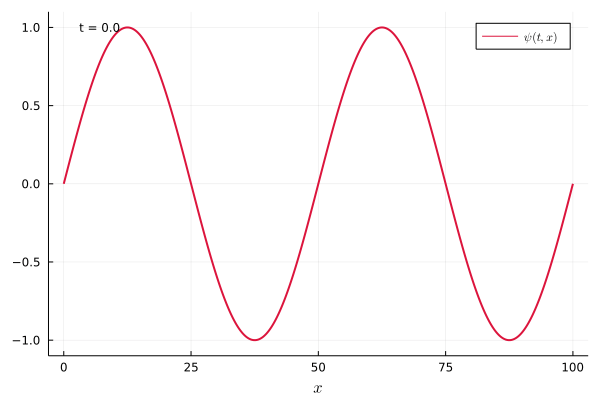

In [3]:
using Plots
using LaTeXStrings

# Definition of the initial sin(x) profile
function sinProfile(x, L=x_f)
    return sin(4*pi*x/L)
end

# Definition of the initial Gaussian profile
function gaussian(x)
    x0 = 30.
    sigma = sqrt(15.)
    return exp(-(x-x0)^2/(2*sigma^2))
end


# Lax-Friedrich Method
function LaxF(psi0, tgrid, xgrid; boundary="outflow")
    dx = xgrid[2] - xgrid[1]
    dt = tgrid[2] - tgrid[1]
    println("dt = $dt")
    println("dx = $dx")
    
    psi = zeros(length(tgrid), length(xgrid))
    psi[1,:] = psi0.(xgrid)
    
    for n in 1:length(tgrid)-1 , j in 2:length(xgrid)-1
            psi[n+1,j] = 0.5*(psi[n,j+1] + psi[n,j-1]) - ((v*dt)/(2*dx))*(psi[n,j+1] - psi[n,j-1])
        if boundary=="outflow" # Outflow boundary conditions
            psi[n+1,1] = psi[n+1,2]
            psi[n+1,end] = psi[n+1,end-1]
        else # Periodic boundary conditions
            if v>0
                psi[n+1,1] = psi[n+1,end-1]
                psi[n+1,end] = psi[n+1,end-1]
            else
                psi[n+1,1] = psi[n+1,2]
                psi[n+1,end] = psi[n+1,1]
            end
        end
    end
    return psi
end


# Velocity of the advection
v = 0.1

# CFL Coefficient
C = 0.1

# Definition of the grids
x_i = 0.
x_f = 100.
xgrid = LinRange(x_i, x_f, 1000)
dx = xgrid[2] - xgrid[1]

t_i = 0.
t_f = 1000.
dt = C*dx/abs(v)
tgrid = t_i:dt:t_f



#psi = FTCS(sinProfile, tgrid, xgrid, boundary="periodic")
psi = LaxF(sinProfile, tgrid, xgrid, boundary="periodic")



anim = @animate for i in 1:150:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson", ylims=(-1.1,1.1))
    xlabel!(L"x")
    annotate!(7,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "advectionLaxF.gif", fps = 15)


--- 
### 4. Método Leap-Frog 

El método **Leap Frog (LF)** (también llamado método del punto medio) es de segundo orden tanto en el tiempo como en el espacio. Éste viene dado por la ecuación

\begin{equation}
\psi_j^{(n+1)} = \psi_j^{(n-1)} - \frac{v \Delta t}{\Delta
x} \left(\psi^{(n)}_{j+1} - \psi^{(n)}_{j-1}\right)\,\,.
\end{equation}

Es posible demostrar que este método es estable para $\alpha < 1$ y se caracteriza porque **no es disipativo**. Esto significa que el perfil inicial se traslada sin cambiar pero un estudio detallado muestra que los modos que componen el perfil no se desplazan con la misma velocidad, lo cual puede llevar a oscilaciones de alta frecuencia  que no se amortiguan (no se incluye una "viscosidad numérica").

dt = 0.10010010010010009
dx = 0.10010010010010009


┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionLeapFrog.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionLeapFrog.gif")
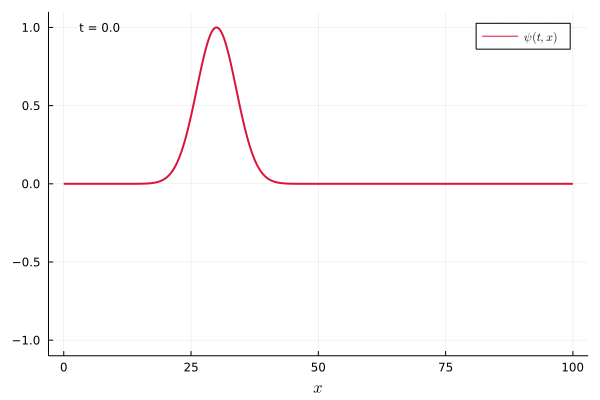

In [7]:
using Plots
using LaTeXStrings

# Definition of the initial sin(x) profile
function sinProfile(x; L=x_f)
    return sin(4*pi*x/L)
end

# Definition of the initial Gaussian profile
function gaussian(x)
    x0 = 30.
    sigma = sqrt(15.)
    return exp(-(x-x0)^2/(2*sigma^2))
end


# Leap-Frog Method
function LeapFrog(psi0, tgrid, xgrid; boundary="outflow")
    dx = xgrid[2] - xgrid[1]
    dt = tgrid[2] - tgrid[1]
    println("dt = $dt")
    println("dx = $dx")
    
    psi = zeros(length(tgrid), length(xgrid))
    psi[1,:] = psi0.(xgrid)
    psi[2,:] = psi[1,:] # Extra step to initialize de algorithm
    
    for n in 2:length(tgrid)-1 , j in 2:length(xgrid)-1
            psi[n+1,j] = psi[n-1,j] - ((v*dt)/(dx))*(psi[n,j+1] - psi[n,j-1])
        if boundary=="outflow" # Outflow boundary conditions
            psi[n+1,1] = psi[n+1,2]
            psi[n+1,end] = psi[n+1,end-1]
        else # Periodic boundary conditions
            if v>0
                psi[n+1,1] = psi[n+1,end-1]
                psi[n+1,end] = psi[n+1,end-1]
            else
                psi[n+1,1] = psi[n+1,2]
                psi[n+1,end] = psi[n+1,1]
            end
        end
    end
    return psi
end


# Velocity of the advection
v = 0.1

# CFL Coefficient
C = 0.1

# Definition of the grids
x_i = 0.
x_f = 100.
xgrid = LinRange(x_i, x_f, 1000)
dx = xgrid[2] - xgrid[1]

t_i = 0.
t_f = 1500. #If you increase the final time, the high-freq oscillations will appear
dt = C*dx/abs(v)
tgrid = t_i:dt:t_f


psi = LeapFrog(gaussian, tgrid, xgrid, boundary="periodic")



anim = @animate for i in 1:150:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson", ylims=(-1.1,1.1))
    xlabel!(L"x")
    annotate!(7,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "advectionLeapFrog.gif", fps = 15)



---

### 5.Método Lax-Wendroff 

El método **Lax-Wendroff** es una extensión de método Lax-Friedrich haciendolo de segundo orden en el tiempo y en el espacio. La ecuación que lo define es

\begin{equation}
\psi_j^{(n+1)} = \psi_j^n - \frac{v\Delta t}{2\Delta x} \left(\psi_{j+1}^{(n)}
- \psi_{j-1}^{(n)} \right) + \frac{v^2(\Delta t)^2}{2(\Delta x)^2} \left(
\psi_{j-1}^{(n)} - 2 \psi_j^{(n)} + \psi_{j+1}^{(n)}\right)\,\,.
\end{equation}

Este método posee una mejor precisión que el método Lax-Friedrich y es estable para $\alpha \le 1$.

dt = 0.10010010010010009
dx = 0.10010010010010009


┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionLaxW.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/05. PDEs I/advectionLaxW.gif")
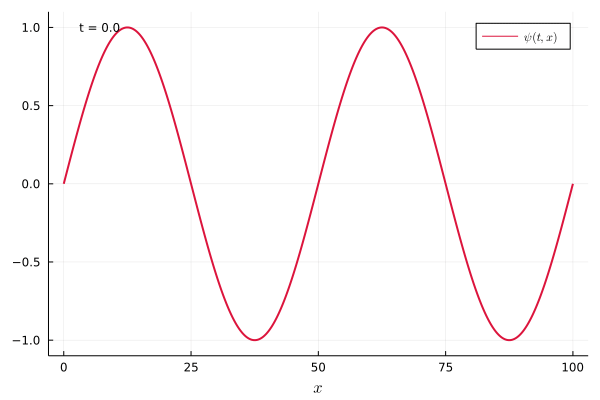

In [15]:
using Plots
using LaTeXStrings

# Definition of the initial sin(x) profile
function sinProfile(x; L=x_f)
    return sin(4*pi*x/L)
end

# Definition of the initial Gaussian profile
function gaussian(x)
    x0 = 30.
    sigma = sqrt(15.)
    return exp(-(x-x0)^2/(2*sigma^2))
end


# Lax-Wendroff Method
function LaxW(psi0, tgrid, xgrid; boundary="outflow")
    dx = xgrid[2] - xgrid[1]
    dt = tgrid[2] - tgrid[1]
    println("dt = $dt")
    println("dx = $dx")
    
    psi = zeros(length(tgrid), length(xgrid))
    psi[1,:] = psi0.(xgrid)
    
    for n in 1:length(tgrid)-1 , j in 2:length(xgrid)-1
            psi[n+1,j] = psi[n,j] - ((v*dt)/(2*dx))*(psi[n,j+1] - psi[n,j-1]) + 
                            0.5*((v*dt)/dx)^2*(psi[n,j-1] -2*psi[n,j] + psi[n,j+1])
        if boundary=="outflow" # Outflow boundary conditions
            psi[n+1,1] = psi[n+1,2]
            psi[n+1,end] = psi[n+1,end-1]
        else # Periodic boundary conditions
            if v>0
                psi[n+1,1] = psi[n+1,end-1]
                psi[n+1,end] = psi[n+1,end-1]
            else
                psi[n+1,1] = psi[n+1,2]
                psi[n+1,end] = psi[n+1,1]
            end
        end
    end
    return psi
end


# Velocity of the advection
v = 0.1

# CFL Coefficient
C = 0.1

# Definition of the grids
x_i = 0.
x_f = 100.
xgrid = LinRange(x_i, x_f, 1000)
dx = xgrid[2] - xgrid[1]

t_i = 0.
t_f = 1000. 
dt = C*dx/abs(v)
tgrid = t_i:dt:t_f



psi = LaxW(sinProfile, tgrid, xgrid, boundary="periodic")



anim = @animate for i in 1:150:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson", ylims=(-1.1,1.1))
    xlabel!(L"x")
    annotate!(7,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "advectionLaxW.gif", fps = 15)
